In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.linear_model import LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

C:\Users\ambik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv(r"C:\Users\ambik\Downloads\IPL_Ball_by_Ball_2008_2022.csv")
df1

ID  innings  overs  ballnumber       batter          bowler  \
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run  \
0        JC Buttler        NaN            0           0          0   
1        JC Buttler    legbyes            0           1          1   
2       YBK Jaiswal        NaN            1           0          1   
3        JC Buttler        NaN            0           0          0   
4        JC Buttler        NaN            0           0          0   
...             ...        ...          ...         ...        ...   
225949     SB Joshi    legbyes            0           1          1   
225950      P Kumar        NaN            1           0          1   
225951     SB Joshi        NaN            0           0          0   
225952      P Kumar      wides            0           1          1   
225953      P Kumar        NaN            0           0          0   

        non_boundary  isWicketDelivery player_out    kind fielders_involved  \
0                  0                 0        NaN     NaN               NaN   
1                  0                 0        NaN     NaN               NaN   
2                  0                 0        NaN     NaN               NaN   
3                  0                 0        NaN     NaN               NaN   
4                  0                 0        NaN     NaN               NaN   
...              ...               ...        ...     ...               ...   
225949             0                 0        NaN     NaN               NaN   
225950             0                 0        NaN     NaN               NaN   
225951             0                 0        NaN     NaN               NaN   
225952             0                 0        NaN     NaN               NaN   
225953             0                 1   SB Joshi  caught       BB McCullum   

                        BattingTeam  
0                  Rajasthan Royals  
1                  Rajasthan Royals  
2                  Rajasthan Royals  
3                  Rajasthan Royals  
4                  Rajasthan Royals  
...                             ...  
225949  Royal Challengers Bangalore  
225950  Royal Challengers Bangalore  
225951  Royal Challengers Bangalore  
225952  Royal Challengers Bangalore  
225953  Royal Challengers Bangalore  

[225954 rows x 17 columns]

In [3]:
df1.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [4]:
ipl1 = df1.drop(columns=['extra_type','player_out','kind','fielders_involved'])
ipl1

ID  innings  overs  ballnumber       batter          bowler  \
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker  batsman_run  extras_run  total_run  non_boundary  \
0        JC Buttler            0           0          0             0   
1        JC Buttler            0           1          1             0   
2       YBK Jaiswal            1           0          1             0   
3        JC Buttler            0           0          0             0   
4        JC Buttler            0           0          0             0   
...             ...          ...         ...        ...           ...   
225949     SB Joshi            0           1          1             0   
225950      P Kumar            1           0          1             0   
225951     SB Joshi            0           0          0             0   
225952      P Kumar            0           1          1             0   
225953      P Kumar            0           0          0             0   

        isWicketDelivery                  BattingTeam  
0                      0             Rajasthan Royals  
1                      0             Rajasthan Royals  
2                      0             Rajasthan Royals  
3                      0             Rajasthan Royals  
4                      0             Rajasthan Royals  
...                  ...                          ...  
225949                 0  Royal Challengers Bangalore  
225950                 0  Royal Challengers Bangalore  
225951                 0  Royal Challengers Bangalore  
225952                 0  Royal Challengers Bangalore  
225953                 1  Royal Challengers Bangalore  

[225954 rows x 13 columns]

In [5]:
ipl1.isnull().sum()

ID                  0
innings             0
overs               0
ballnumber          0
batter              0
bowler              0
non-striker         0
batsman_run         0
extras_run          0
total_run           0
non_boundary        0
isWicketDelivery    0
BattingTeam         0
dtype: int64

In [6]:
ipl1.describe()

ID        innings          overs     ballnumber  \
count  2.259540e+05  225954.000000  225954.000000  225954.000000   
mean   8.320470e+05       1.483868       9.185679       3.619750   
std    3.379542e+05       0.503104       5.681797       1.810633   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.012620e+05       1.000000       4.000000       2.000000   
50%    8.297370e+05       1.000000       9.000000       4.000000   
75%    1.178395e+06       2.000000      14.000000       5.000000   
max    1.312200e+06       6.000000      19.000000      10.000000   

         batsman_run     extras_run     total_run   non_boundary  \
count  225954.000000  225954.000000  225954.00000  225954.000000   
mean        1.243523       0.066907       1.31043       0.000093   
std         1.618166       0.341470       1.60605       0.009640   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         1.000000       0.000000       1.00000       0.000000   
75%         1.000000       0.000000       1.00000       0.000000   
max         6.000000       7.000000       7.00000       1.000000   

       isWicketDelivery  
count     225954.000000  
mean           0.049351  
std            0.216600  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [7]:
ipl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                225954 non-null  int64 
 1   innings           225954 non-null  int64 
 2   overs             225954 non-null  int64 
 3   ballnumber        225954 non-null  int64 
 4   batter            225954 non-null  object
 5   bowler            225954 non-null  object
 6   non-striker       225954 non-null  object
 7   batsman_run       225954 non-null  int64 
 8   extras_run        225954 non-null  int64 
 9   total_run         225954 non-null  int64 
 10  non_boundary      225954 non-null  int64 
 11  isWicketDelivery  225954 non-null  int64 
 12  BattingTeam       225954 non-null  object
dtypes: int64(9), object(4)
memory usage: 22.4+ MB


In [8]:
df2 = pd.read_csv(r"C:\Users\ambik\Downloads\IPL_Matches_2008_2022.csv")
df2

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad                 Punjab Kings   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N                 Punjab Kings  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players  \
0      NaN       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      NaN      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      NaN      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3      NaN       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4      NaN   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..     ...             ...                                                ...   
945    NaN       DJ Hussey  ['WP Saha', 'BB

In [9]:
df2.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [10]:
ipl2 = df2.drop(columns=['method'])
ipl2

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad                 Punjab Kings   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N                 Punjab Kings  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    Player_of_Match                                       Team1Players  \
0         HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1        JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2        RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3         DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4     Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..              ...                                                ...   
945       DJ Hussey  ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...   
946      MV Bouche

In [11]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [12]:
ipl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  Player_of_Match  946 non-null    object 
 15  Team1Players     950 non-null    object 
 16  Team2Players     950 non-null    object 
 17  Umpire1         

In [13]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty

ipl2[ipl2.City.isnull()][['City','Venue']]

City                                Venue
134  NaN  Dubai International Cricket Stadium
137  NaN  Dubai International Cricket Stadium
138  NaN              Sharjah Cricket Stadium
140  NaN  Dubai International Cricket Stadium
142  NaN  Dubai International Cricket Stadium
143  NaN              Sharjah Cricket Stadium
145  NaN  Dubai International Cricket Stadium
147  NaN  Dubai International Cricket Stadium
148  NaN              Sharjah Cricket Stadium
150  NaN  Dubai International Cricket Stadium
151  NaN  Dubai International Cricket Stadium
153  NaN              Sharjah Cricket Stadium
154  NaN  Dubai International Cricket Stadium
156  NaN  Dubai International Cricket Stadium
159  NaN  Dubai International Cricket Stadium
160  NaN  Dubai International Cricket Stadium
161  NaN              Sharjah Cricket Stadium
163  NaN              Sharjah Cricket Stadium
164  NaN  Dubai International Cricket Stadium
165  NaN  Dubai International Cricket Stadium
166  NaN              Sharjah Cricket Stadium
167  NaN  Dubai International Cricket Stadium
170  NaN  Dubai International Cricket Stadium
171  NaN              Sharjah Cricket Stadium
172  NaN  Dubai International Cricket Stadium
175  NaN  Dubai International Cricket Stadium
176  NaN  Dubai International Cricket Stadium
177  NaN              Sharjah Cricket Stadium
179  NaN              Sharjah Cricket Stadium
180  NaN  Dubai International Cricket Stadium
182  NaN  Dubai International Cricket Stadium
184  NaN  Dubai International Cricket Stadium
185  NaN              Sharjah Cricket Stadium
187  NaN  Dubai International Cricket Stadium
188  NaN  Dubai International Cricket Stadium
190  NaN              Sharjah Cricket Stadium
191  NaN  Dubai International Cricket Stadium
192  NaN  Dubai International Cricket Stadium
532  NaN  Dubai International Cricket Stadium
534  NaN  Dubai International Cricket Stadium
535  NaN              Sharjah Cricket Stadium
536  NaN              Sharjah Cricket Stadium
539  NaN  Dubai International Cricket Stadium
540  NaN  Dubai International Cricket Stadium
541  NaN              Sharjah Cricket Stadium
542  NaN  Dubai International Cricket Stadium
543  NaN              Sharjah Cricket Stadium
545  NaN              Sharjah Cricket Stadium
546  NaN  Dubai International Cricket Stadium
547  NaN  Dubai International Cricket Stadium
550  NaN              Sharjah Cricket Stadium

# Finding Total Score of Innings

In [14]:
total_score = ipl1.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [15]:
total_score.head()

ID  innings  total_run
0  335982        1        222
1  335982        2         82
2  335983        1        240
3  335983        2        207
4  335984        1        129

# We only need score of 1st inning
our target is winner prediction, so we only need score of first inning

In [16]:
total_score = total_score[total_score['innings'] == 1]
total_score.head()

ID  innings  total_run
0  335982        1        222
2  335983        1        240
4  335984        1        129
6  335985        1        165
8  335986        1        110

In [17]:
fig = px.histogram(total_score, nbins = 50, x = 'total_run')
fig.show()

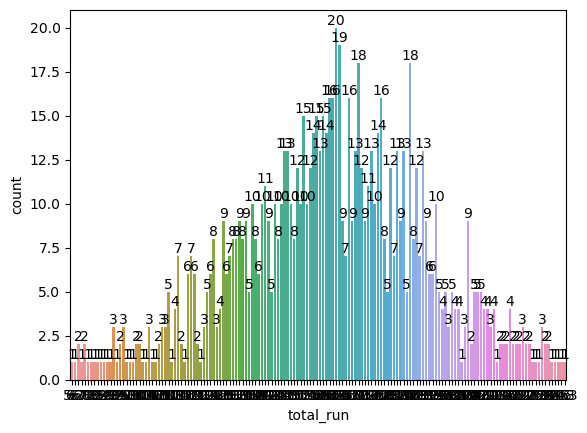

In [18]:
ax = sns.countplot(data = total_score, x = 'total_run')
for bar in ax.containers:
    ax.bar_label(bar)

In [19]:
total_score['target'] = total_score['total_run'] + 1

Merge with the ipl2 dataset

In [20]:
match_df = ipl2.merge(total_score[['ID','target']], on = 'ID')
match_df

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad                 Punjab Kings   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N                 Punjab Kings  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    Player_of_Match                                       Team1Players  \
0         HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1        JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2        RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3         DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4     Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..              ...                                                ...   
945       DJ Hussey  ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...   
946      MV Bouche

# Removing old teams / updating teams new names

In [21]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [22]:
match_df['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [23]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [24]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [25]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['WinningTeam'].isin(teams)]

In [26]:
match_df.shape

(832, 20)

In [27]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [28]:
fig = px.histogram(match_df, x='WinningTeam')
fig.show()

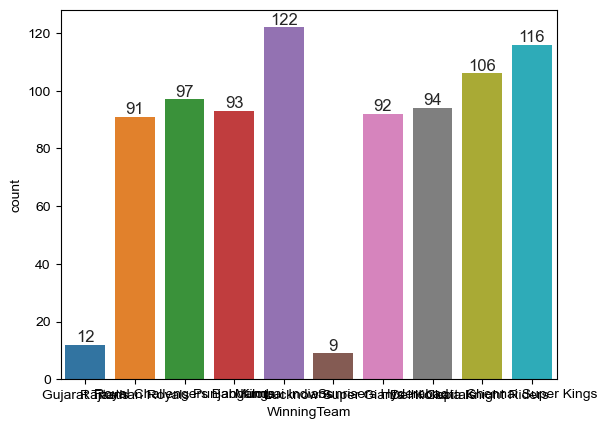

In [29]:
ax=sns.countplot(data=match_df,x='WinningTeam')
sns.set(rc={'figure.figsize':(50,10)})
for bars in ax.containers:
    ax.bar_label(bars)

# We want only the matches where D/L is not applied
Removing all matches effected due to rain

In [30]:
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','target']].dropna()

In [31]:
match_df.head()

ID       City                        Team1                 Team2  \
0  1312200  Ahmedabad             Rajasthan Royals        Gujarat Titans   
1  1312199  Ahmedabad  Royal Challengers Bangalore      Rajasthan Royals   
2  1312198    Kolkata  Royal Challengers Bangalore  Lucknow Super Giants   
3  1312197    Kolkata             Rajasthan Royals        Gujarat Titans   
4  1304116     Mumbai          Sunrisers Hyderabad          Punjab Kings   

                   WinningTeam  target  
0               Gujarat Titans     131  
1             Rajasthan Royals     158  
2  Royal Challengers Bangalore     208  
3               Gujarat Titans     189  
4                 Punjab Kings     158

In [32]:
match_df.isna().sum()

ID             0
City           0
Team1          0
Team2          0
WinningTeam    0
target         0
dtype: int64

In [33]:
ipl1.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'BattingTeam'],
      dtype='object')

In [34]:
ipl1['BattingTeam'] = ipl1['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
ipl1['BattingTeam'] = ipl1['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
ipl1['BattingTeam'] = ipl1['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

ipl1 = ipl1[ipl1['BattingTeam'].isin(teams)]

In [35]:
balls_df = match_df.merge(ipl1, on = 'ID')
balls_df

ID       City                        Team1  \
0       1312200  Ahmedabad             Rajasthan Royals   
1       1312200  Ahmedabad             Rajasthan Royals   
2       1312200  Ahmedabad             Rajasthan Royals   
3       1312200  Ahmedabad             Rajasthan Royals   
4       1312200  Ahmedabad             Rajasthan Royals   
...         ...        ...                          ...   
186224   335982  Bangalore  Royal Challengers Bangalore   
186225   335982  Bangalore  Royal Challengers Bangalore   
186226   335982  Bangalore  Royal Challengers Bangalore   
186227   335982  Bangalore  Royal Challengers Bangalore   
186228   335982  Bangalore  Royal Challengers Bangalore   

                        Team2            WinningTeam  target  innings  overs  \
0              Gujarat Titans         Gujarat Titans     131        1      0   
1              Gujarat Titans         Gujarat Titans     131        1      0   
2              Gujarat Titans         Gujarat Titans     131        1      0   
3              Gujarat Titans         Gujarat Titans     131        1      0   
4              Gujarat Titans         Gujarat Titans     131        1      0   
...                       ...                    ...     ...      ...    ...   
186224  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186225  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186226  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186227  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   
186228  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   

        ballnumber       batter          bowler  non-striker  batsman_run  \
0                1  YBK Jaiswal  Mohammed Shami   JC Buttler            0   
1                2  YBK Jaiswal  Mohammed Shami   JC Buttler            0   
2                3   JC Buttler  Mohammed Shami  YBK Jaiswal            1   
3                4  YBK Jaiswal  Mohammed Shami   JC Buttler            0   
4                5  YBK Jaiswal  Mohammed Shami   JC Buttler            0   
...            ...          ...             ...          ...          ...   
186224           5      P Kumar        I Sharma     SB Joshi            0   
186225           6     SB Joshi        I Sharma      P Kumar            1   
186226           7      P Kumar        I Sharma     SB Joshi            0   
186227           1     SB Joshi       LR Shukla      P Kumar            0   
186228           2     SB Joshi       LR Shukla      P Kumar            0   

        extras_run  total_run  non_boundary  isWicketDelivery  \
0                0          0             0                 0   
1                1          1             0                 0   
2                0          1             0                 0   
3                0          0             0                 0   
4                0          0             0                 0   
...            ...        ...           ...               ...   
186224           1          1             0                 0   
186225           0          1             0                 0   
186226           0          0             0                 0   
186227           1          1             0                 0   
186228           0          0             0                 1   

                        BattingTeam  
0                  Rajasthan Royals  
1                  Rajasthan Royals  
2                  Rajasthan Royals  
3                  Rajasthan Royals  
4                  Rajasthan Royals  
...                             ...  
186224  Royal Challengers Bangalore  
186225  Royal Challengers Bangalore  
186226  Royal Challengers Bangalore  
186227  Royal Challengers Bangalore  
186228  Royal Challengers Bangalore  

[186229 rows x 18 columns]

In [36]:
balls_df['BattingTeam'].value_counts()

Mumbai Indians                 24330
Sunrisers Hyderabad            23545
Kolkata Knight Riders          23493
Royal Challengers Bangalore    22722
Punjab Kings                   22716
Chennai Super Kings            22588
Delhi Capitals                 22412
Rajasthan Royals               20612
Gujarat Titans                  1971
Lucknow Super Giants            1840
Name: BattingTeam, dtype: int64

In [37]:
fig = px.bar(balls_df['BattingTeam'].value_counts())
fig.show()

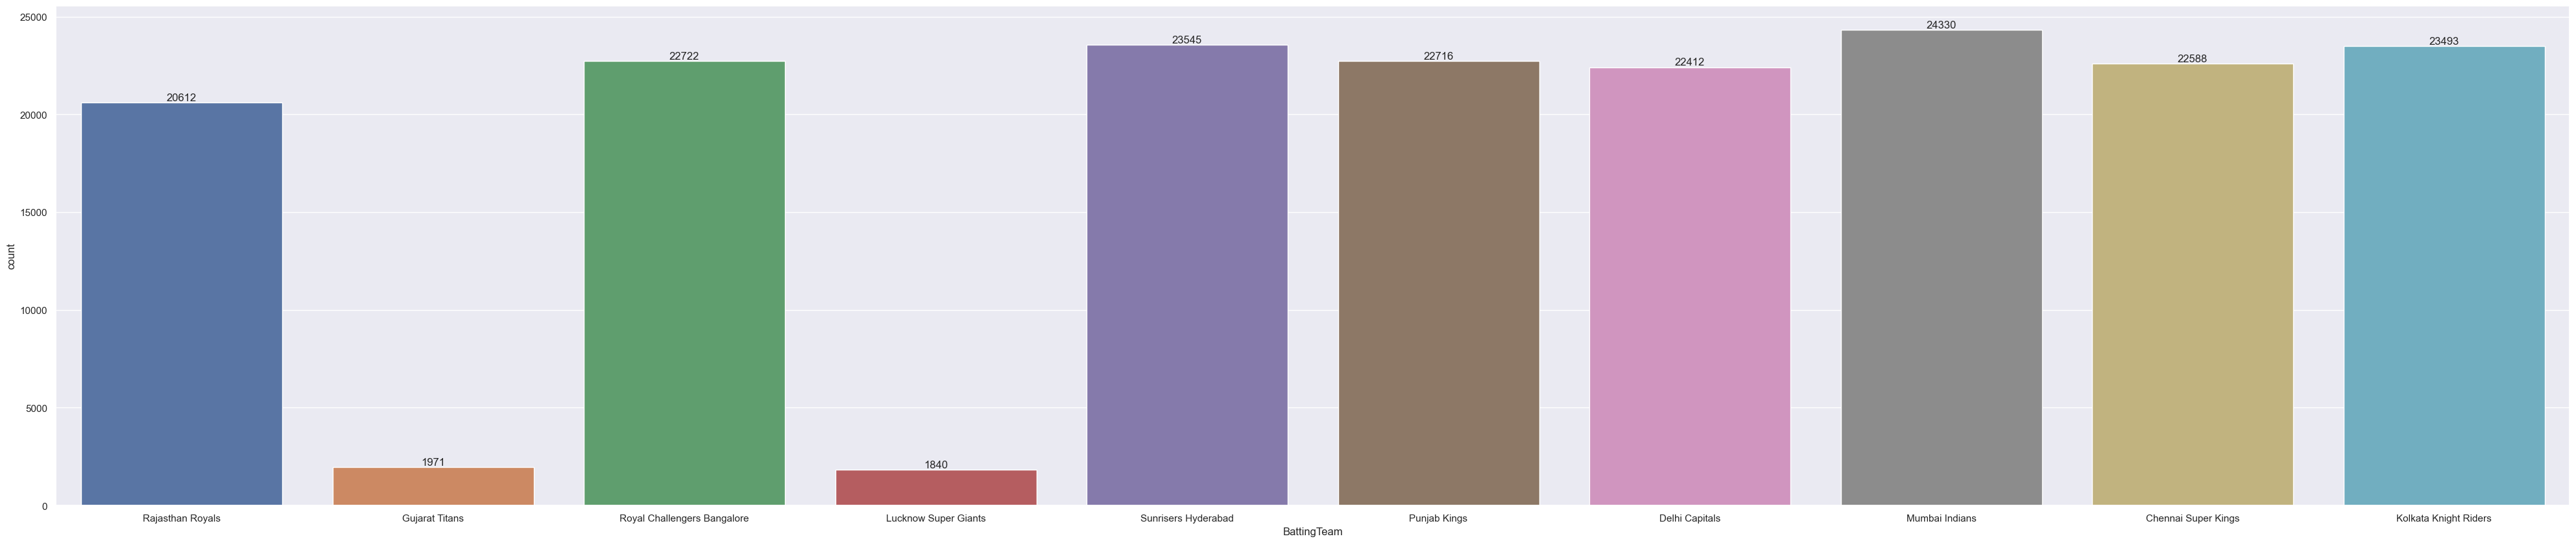

In [38]:
ax=sns.countplot(data=balls_df,x='BattingTeam')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'BattingTeam'],
      dtype='object')

Only select rows where we have 2nd innings

In [40]:
balls_df = balls_df[balls_df['innings']==2]
balls_df

ID       City                        Team1  \
120     1312200  Ahmedabad             Rajasthan Royals   
121     1312200  Ahmedabad             Rajasthan Royals   
122     1312200  Ahmedabad             Rajasthan Royals   
123     1312200  Ahmedabad             Rajasthan Royals   
124     1312200  Ahmedabad             Rajasthan Royals   
...         ...        ...                          ...   
186224   335982  Bangalore  Royal Challengers Bangalore   
186225   335982  Bangalore  Royal Challengers Bangalore   
186226   335982  Bangalore  Royal Challengers Bangalore   
186227   335982  Bangalore  Royal Challengers Bangalore   
186228   335982  Bangalore  Royal Challengers Bangalore   

                        Team2            WinningTeam  target  innings  overs  \
120            Gujarat Titans         Gujarat Titans     131        2      0   
121            Gujarat Titans         Gujarat Titans     131        2      0   
122            Gujarat Titans         Gujarat Titans     131        2      0   
123            Gujarat Titans         Gujarat Titans     131        2      0   
124            Gujarat Titans         Gujarat Titans     131        2      0   
...                       ...                    ...     ...      ...    ...   
186224  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186225  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186226  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186227  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   
186228  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   

        ballnumber        batter     bowler   non-striker  batsman_run  \
120              1       WP Saha   TA Boult  Shubman Gill            0   
121              2       WP Saha   TA Boult  Shubman Gill            0   
122              3       WP Saha   TA Boult  Shubman Gill            1   
123              4  Shubman Gill   TA Boult       WP Saha            0   
124              5  Shubman Gill   TA Boult       WP Saha            0   
...            ...           ...        ...           ...          ...   
186224           5       P Kumar   I Sharma      SB Joshi            0   
186225           6      SB Joshi   I Sharma       P Kumar            1   
186226           7       P Kumar   I Sharma      SB Joshi            0   
186227           1      SB Joshi  LR Shukla       P Kumar            0   
186228           2      SB Joshi  LR Shukla       P Kumar            0   

        extras_run  total_run  non_boundary  isWicketDelivery  \
120              0          0             0                 0   
121              0          0             0                 0   
122              0          1             0                 0   
123              0          0             0                 0   
124              0          0             0                 0   
...            ...        ...           ...               ...   
186224           1          1             0                 0   
186225           0          1             0                 0   
186226           0          0             0                 0   
186227           1          1             0                 0   
186228           0          0             0                 1   

                        BattingTeam  
120                  Gujarat Titans  
121                  Gujarat Titans  
122                  Gujarat Titans  
123                  Gujarat Titans  
124                  Gujarat Titans  
...                             ...  
186224  Royal Challengers Bangalore  
186225  Royal Challengers Bangalore  
186226  Royal Challengers Bangalore  
186227  Royal Challengers Bangalore  
186228  Royal Challengers Bangalore  

[89935 rows x 18 columns]

In [41]:
balls_df.shape

(89935, 18)

In [42]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'BattingTeam'],
      dtype='object')

# Create new row current_score after each ball

In [43]:
balls_df['current_score'] = balls_df.groupby('ID')['total_run'].cumsum()
balls_df

ID       City                        Team1  \
120     1312200  Ahmedabad             Rajasthan Royals   
121     1312200  Ahmedabad             Rajasthan Royals   
122     1312200  Ahmedabad             Rajasthan Royals   
123     1312200  Ahmedabad             Rajasthan Royals   
124     1312200  Ahmedabad             Rajasthan Royals   
...         ...        ...                          ...   
186224   335982  Bangalore  Royal Challengers Bangalore   
186225   335982  Bangalore  Royal Challengers Bangalore   
186226   335982  Bangalore  Royal Challengers Bangalore   
186227   335982  Bangalore  Royal Challengers Bangalore   
186228   335982  Bangalore  Royal Challengers Bangalore   

                        Team2            WinningTeam  target  innings  overs  \
120            Gujarat Titans         Gujarat Titans     131        2      0   
121            Gujarat Titans         Gujarat Titans     131        2      0   
122            Gujarat Titans         Gujarat Titans     131        2      0   
123            Gujarat Titans         Gujarat Titans     131        2      0   
124            Gujarat Titans         Gujarat Titans     131        2      0   
...                       ...                    ...     ...      ...    ...   
186224  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186225  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186226  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186227  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   
186228  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   

        ballnumber        batter     bowler   non-striker  batsman_run  \
120              1       WP Saha   TA Boult  Shubman Gill            0   
121              2       WP Saha   TA Boult  Shubman Gill            0   
122              3       WP Saha   TA Boult  Shubman Gill            1   
123              4  Shubman Gill   TA Boult       WP Saha            0   
124              5  Shubman Gill   TA Boult       WP Saha            0   
...            ...           ...        ...           ...          ...   
186224           5       P Kumar   I Sharma      SB Joshi            0   
186225           6      SB Joshi   I Sharma       P Kumar            1   
186226           7       P Kumar   I Sharma      SB Joshi            0   
186227           1      SB Joshi  LR Shukla       P Kumar            0   
186228           2      SB Joshi  LR Shukla       P Kumar            0   

        extras_run  total_run  non_boundary  isWicketDelivery  \
120              0          0             0                 0   
121              0          0             0                 0   
122              0          1             0                 0   
123              0          0             0                 0   
124              0          0             0                 0   
...            ...        ...           ...               ...   
186224           1          1             0                 0   
186225           0          1             0                 0   
186226           0          0             0                 0   
186227           1          1             0                 0   
186228           0          0             0                 1   

                        BattingTeam  current_score  
120                  Gujarat Titans              0  
121                  Gujarat Titans              0  
122                  Gujarat Titans              1  
123                  Gujarat Titans              1  
124                  Gujarat Titans              1  
...                             ...            ...  
186224  Royal Challengers Bangalore             80  
186225  Royal Challengers Bangalore             81  
186226  Royal Challengers Bangalore             81  
186227  Royal Challengers Bangalore             82  
186228  Royal Challengers Bangalore             82  

[89935 rows x 19 columns]

In [44]:
balls_df['runs_left'] = np.where(balls_df['target']-balls_df['current_score']>=0, balls_df['target']-balls_df['current_score'], 0)
balls_df

ID       City                        Team1  \
120     1312200  Ahmedabad             Rajasthan Royals   
121     1312200  Ahmedabad             Rajasthan Royals   
122     1312200  Ahmedabad             Rajasthan Royals   
123     1312200  Ahmedabad             Rajasthan Royals   
124     1312200  Ahmedabad             Rajasthan Royals   
...         ...        ...                          ...   
186224   335982  Bangalore  Royal Challengers Bangalore   
186225   335982  Bangalore  Royal Challengers Bangalore   
186226   335982  Bangalore  Royal Challengers Bangalore   
186227   335982  Bangalore  Royal Challengers Bangalore   
186228   335982  Bangalore  Royal Challengers Bangalore   

                        Team2            WinningTeam  target  innings  overs  \
120            Gujarat Titans         Gujarat Titans     131        2      0   
121            Gujarat Titans         Gujarat Titans     131        2      0   
122            Gujarat Titans         Gujarat Titans     131        2      0   
123            Gujarat Titans         Gujarat Titans     131        2      0   
124            Gujarat Titans         Gujarat Titans     131        2      0   
...                       ...                    ...     ...      ...    ...   
186224  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186225  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186226  Kolkata Knight Riders  Kolkata Knight Riders     223        2     14   
186227  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   
186228  Kolkata Knight Riders  Kolkata Knight Riders     223        2     15   

        ballnumber        batter     bowler   non-striker  batsman_run  \
120              1       WP Saha   TA Boult  Shubman Gill            0   
121              2       WP Saha   TA Boult  Shubman Gill            0   
122              3       WP Saha   TA Boult  Shubman Gill            1   
123              4  Shubman Gill   TA Boult       WP Saha            0   
124              5  Shubman Gill   TA Boult       WP Saha            0   
...            ...           ...        ...           ...          ...   
186224           5       P Kumar   I Sharma      SB Joshi            0   
186225           6      SB Joshi   I Sharma       P Kumar            1   
186226           7       P Kumar   I Sharma      SB Joshi            0   
186227           1      SB Joshi  LR Shukla       P Kumar            0   
186228           2      SB Joshi  LR Shukla       P Kumar            0   

        extras_run  total_run  non_boundary  isWicketDelivery  \
120              0          0             0                 0   
121              0          0             0                 0   
122              0          1             0                 0   
123              0          0             0                 0   
124              0          0             0                 0   
...            ...        ...           ...               ...   
186224           1          1             0                 0   
186225           0          1             0                 0   
186226           0          0             0                 0   
186227           1          1             0                 0   
186228           0          0             0                 1   

                        BattingTeam  current_score  runs_left  
120                  Gujarat Titans              0        131  
121                  Gujarat Titans              0        131  
122                  Gujarat Titans              1        130  
123                  Gujarat Titans              1        130  
124                  Gujarat Titans              1        130  
...                             ...            ...        ...  
186224  Royal Challengers Bangalore             80        143  
186225  Royal Challengers Bangalore             81        142  
186226  Royal Challengers Bangalore             81        142  
186227  Royal Challengers Bangalo

In [45]:
balls_df['balls_left'] = np.where(120 - balls_df['overs']*6 - balls_df['ballnumber']>=0, 120 - balls_df['overs']*6 - balls_df['ballnumber'],0)

In [46]:
balls_df['wickets_left'] = 10 - balls_df.groupby('ID')['isWicketDelivery'].cumsum()

In [47]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left'],
      dtype='object')

In [48]:
balls_df['current_run_rate'] = (balls_df['current_score']*6)/(120-balls_df['balls_left'])

In [49]:
balls_df['required_run_rate'] = np.where(balls_df['balls_left']>0, balls_df['runs_left']*6/balls_df['balls_left'], 0)

In [50]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'batsman_run',
       'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate'],
      dtype='object')

In [51]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [52]:
balls_df['result'] = balls_df.apply(result, axis=1)
balls_df.head()

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter  ... non_boundary  \
120     131        2      0           1       WP Saha  ...            0   
121     131        2      0           2       WP Saha  ...            0   
122     131        2      0           3       WP Saha  ...            0   
123     131        2      0           4  Shubman Gill  ...            0   
124     131        2      0           5  Shubman Gill  ...            0   

    isWicketDelivery     BattingTeam  current_score  runs_left  balls_left  \
120                0  Gujarat Titans              0        131         119   
121                0  Gujarat Titans              0        131         118   
122                0  Gujarat Titans              1        130         117   
123                0  Gujarat Titans              1        130         116   
124                0  Gujarat Titans              1        130         115   

     wickets_left current_run_rate  required_run_rate  result  
120            10              0.0           6.605042       1  
121            10              0.0           6.661017       1  
122            10              2.0           6.666667       1  
123            10              1.5           6.724138       1  
124            10              1.2           6.782609       1  

[5 rows x 25 columns]

In [53]:
index1 = balls_df[balls_df['Team2'] == balls_df['BattingTeam']]['Team1'].index
index2 = balls_df[balls_df['Team1'] == balls_df['BattingTeam']]['Team2'].index

In [54]:
balls_df.loc[index1, 'BowlingTeam'] = balls_df.loc[index1, 'Team1']
balls_df.loc[index2, 'BowlingTeam'] = balls_df.loc[index2, 'Team2']

In [55]:
balls_df.head()

ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter  ... isWicketDelivery  \
120     131        2      0           1       WP Saha  ...                0   
121     131        2      0           2       WP Saha  ...                0   
122     131        2      0           3       WP Saha  ...                0   
123     131        2      0           4  Shubman Gill  ...                0   
124     131        2      0           5  Shubman Gill  ...                0   

        BattingTeam  current_score  runs_left  balls_left  wickets_left  \
120  Gujarat Titans              0        131         119            10   
121  Gujarat Titans              0        131         118            10   
122  Gujarat Titans              1        130         117            10   
123  Gujarat Titans              1        130         116            10   
124  Gujarat Titans              1        130         115            10   

     current_run_rate required_run_rate  result       BowlingTeam  
120               0.0          6.605042       1  Rajasthan Royals  
121               0.0          6.661017       1  Rajasthan Royals  
122               2.0          6.666667       1  Rajasthan Royals  
123               1.5          6.724138       1  Rajasthan Royals  
124               1.2          6.782609       1  Rajasthan Royals  

[5 rows x 26 columns]

In [56]:
final_df = balls_df[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
final_df.head()

BattingTeam       BowlingTeam       City  runs_left  balls_left  \
120  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         119   
121  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         118   
122  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         117   
123  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         116   
124  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         115   

     wickets_left  current_run_rate  required_run_rate  target  result  
120            10               0.0           6.605042     131       1  
121            10               0.0           6.661017     131       1  
122            10               2.0           6.666667     131       1  
123            10               1.5           6.724138     131       1  
124            10               1.2           6.782609     131       1

In [57]:
fig = px.bar(final_df['City'].value_counts())
fig.show()

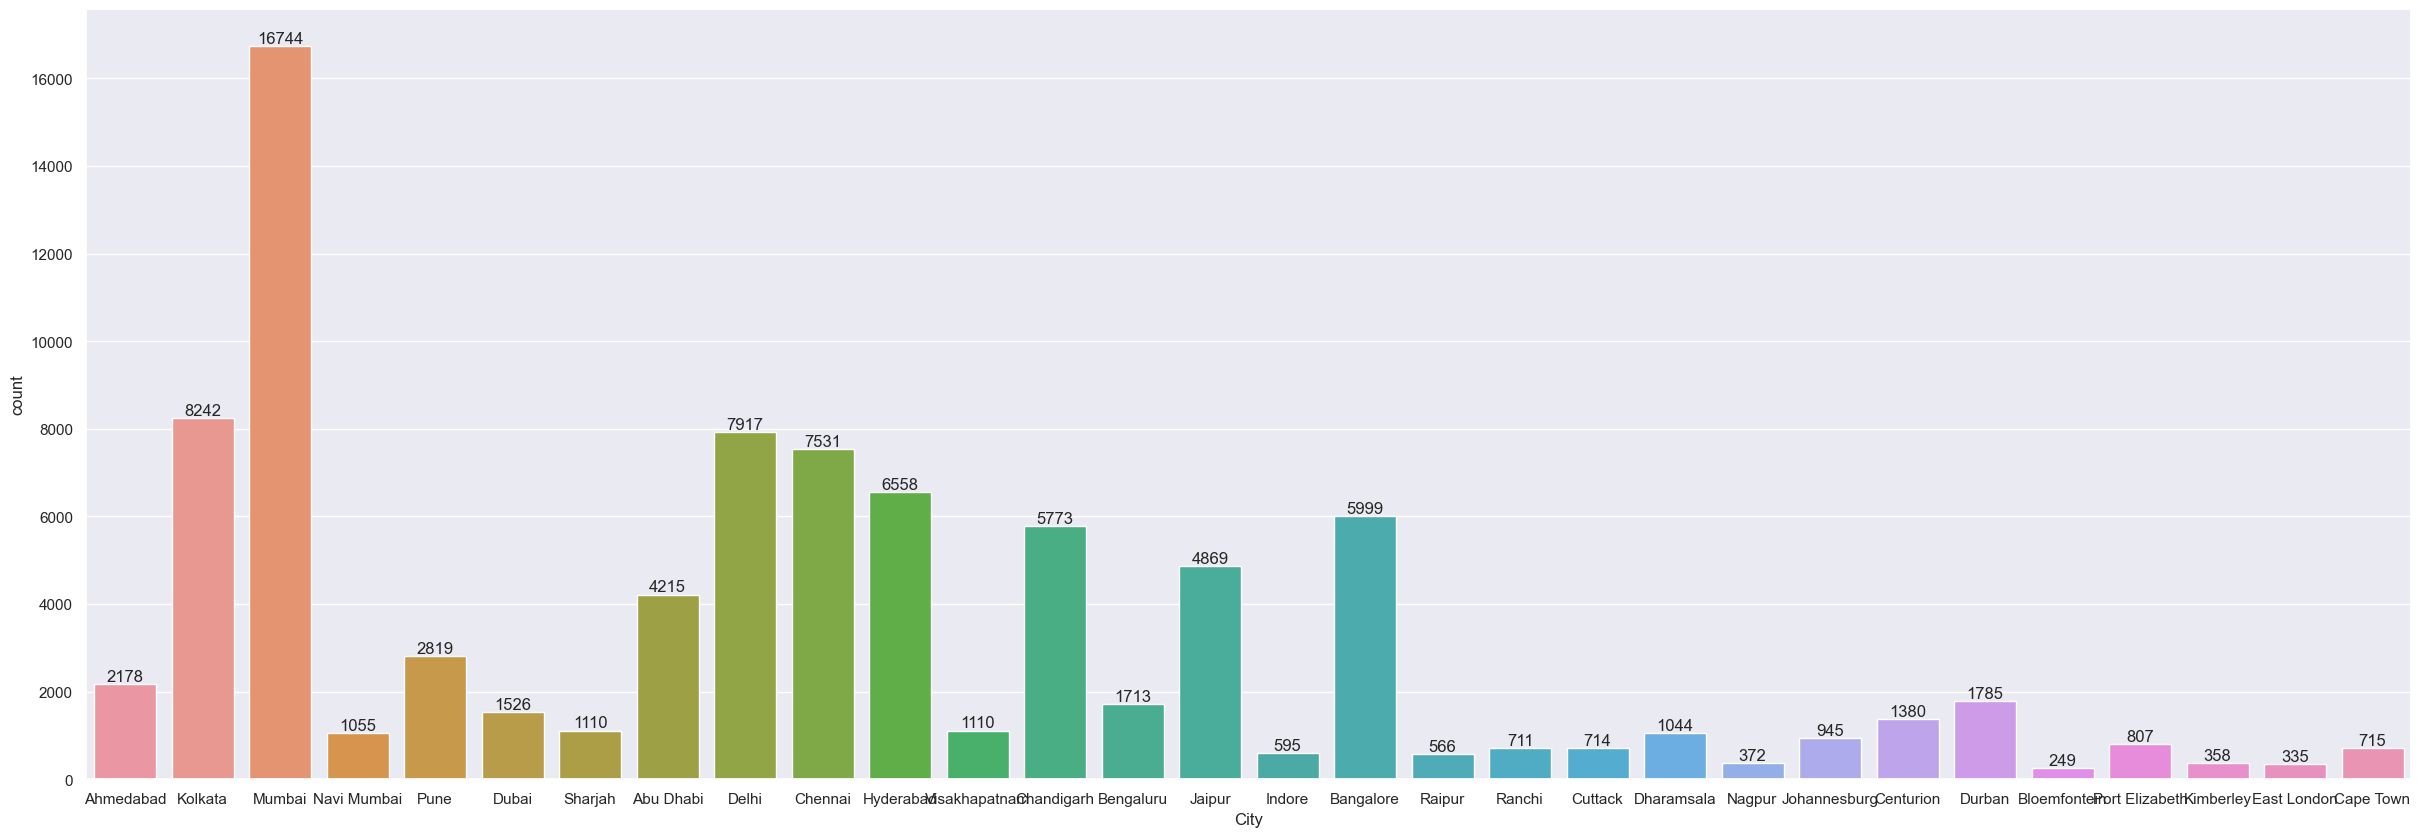

In [58]:
ax=sns.countplot(data=final_df,x='City')

sns.set(rc={'figure.figsize':(30,10)})
for bars in ax.containers:
    ax.bar_label(bars)

In [59]:
fig = px.bar(final_df['BattingTeam'].value_counts())
fig.show()

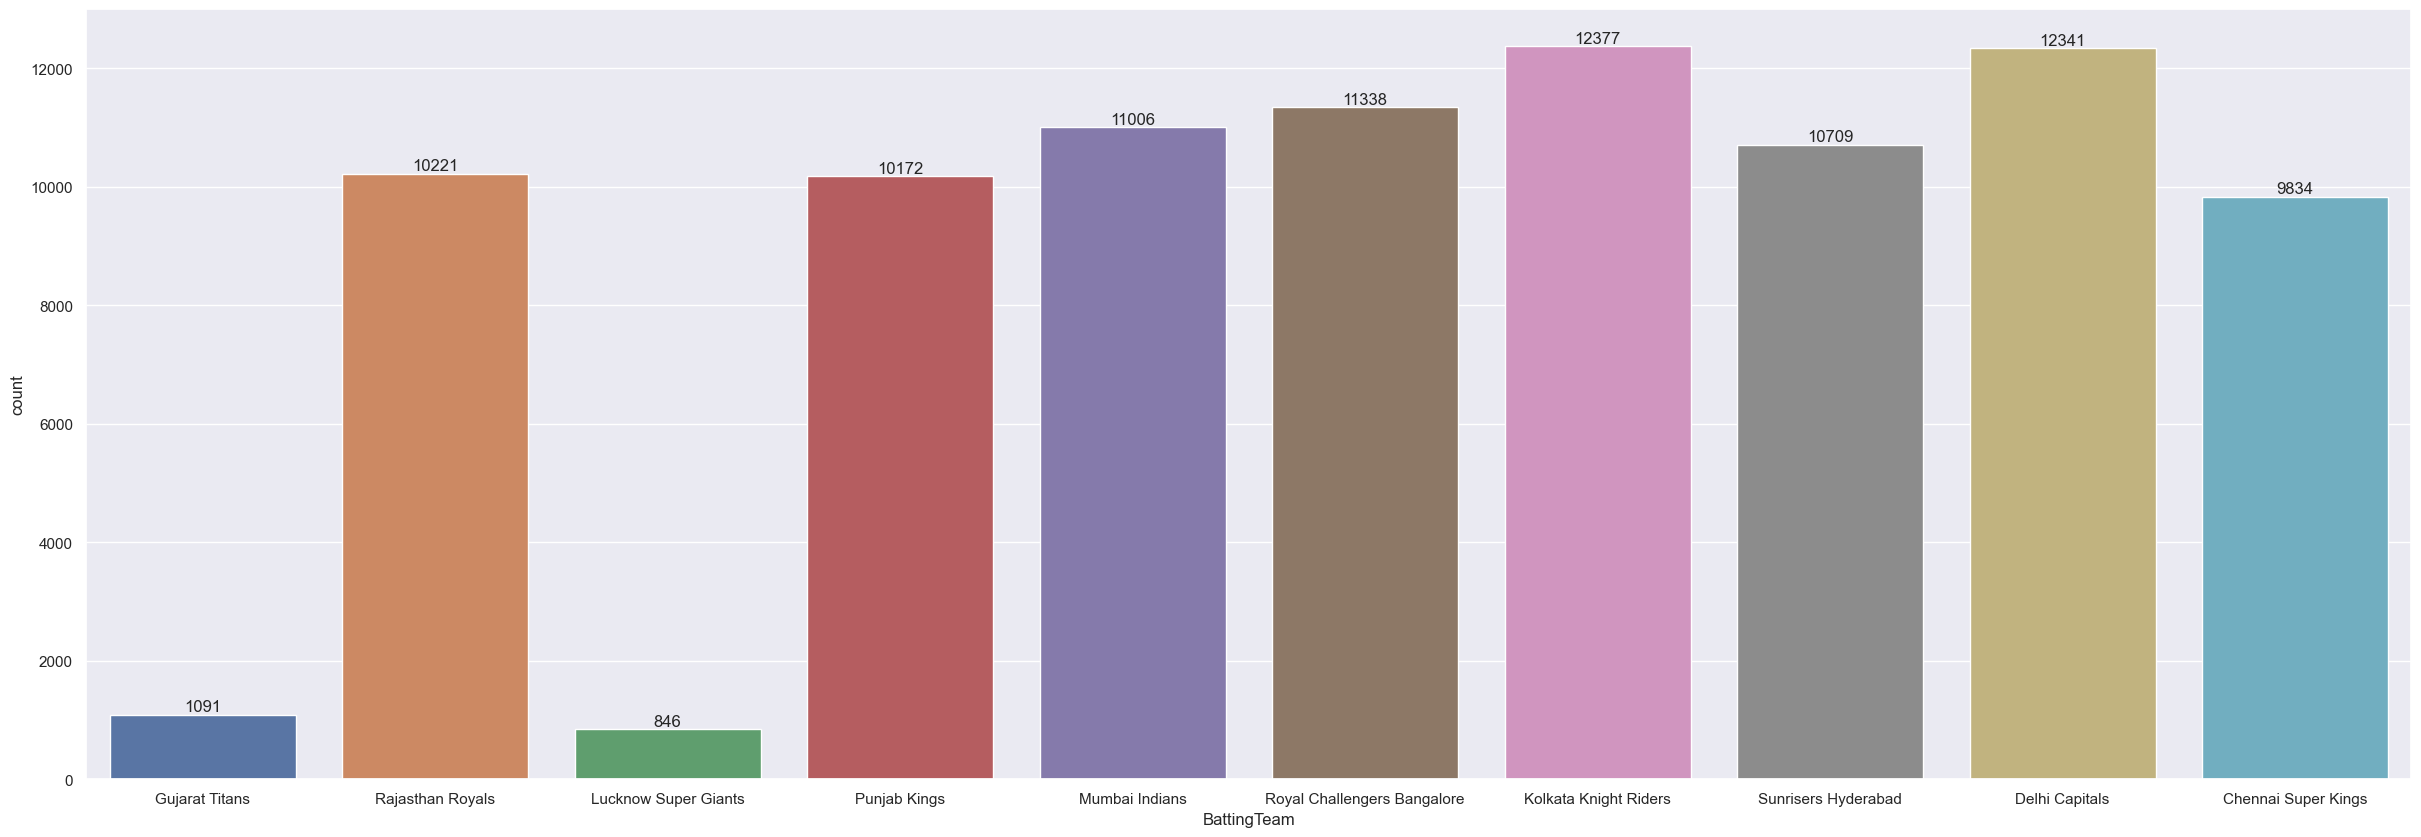

In [60]:
ax=sns.countplot(data=final_df,x='BattingTeam')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax.containers:
    ax.bar_label(bars)

In [61]:
fig = px.bar(final_df['BowlingTeam'].value_counts())
fig.show()

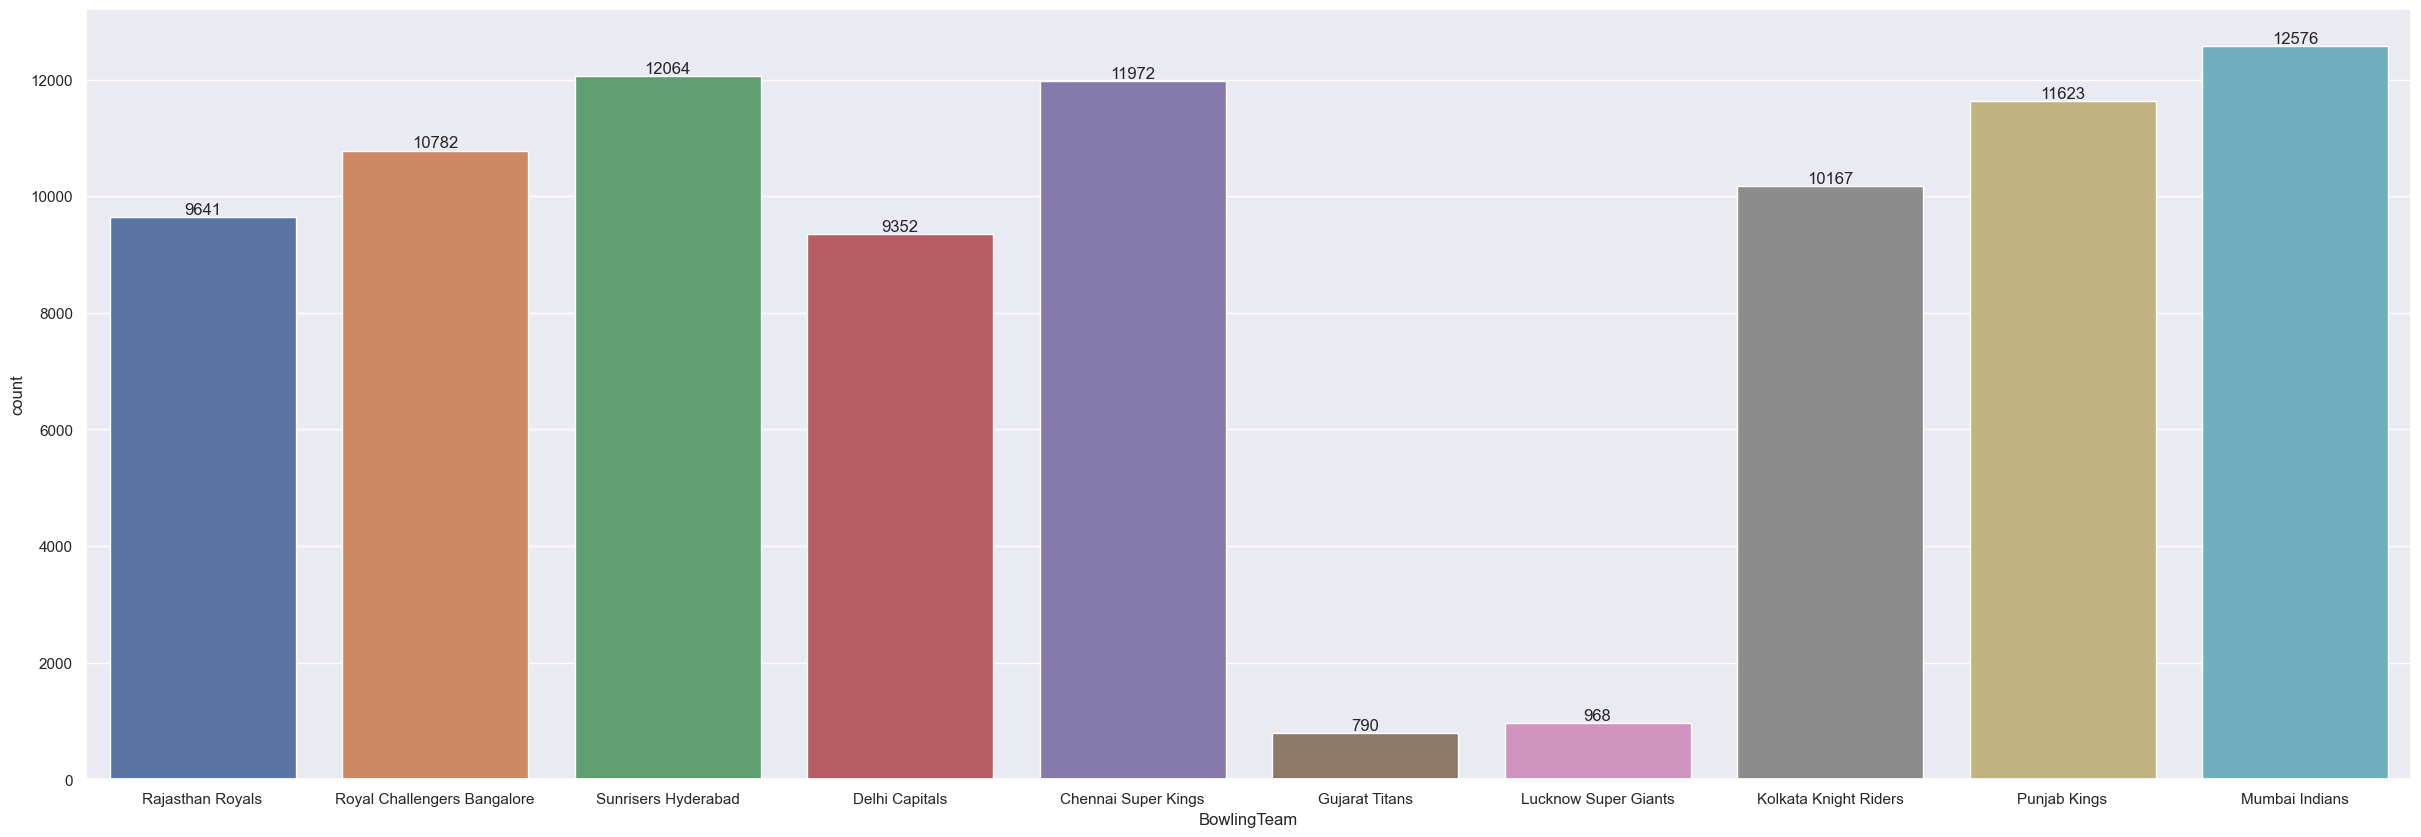

In [62]:
ax=sns.countplot(data=final_df,x='BowlingTeam')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax.containers:
    ax.bar_label(bars)

In [63]:
fig = px.histogram(final_df[final_df['runs_left']>0]['runs_left'], nbins=30,)
fig.show()

In [64]:
fig = px.bar(final_df['wickets_left'].value_counts())
fig.show()

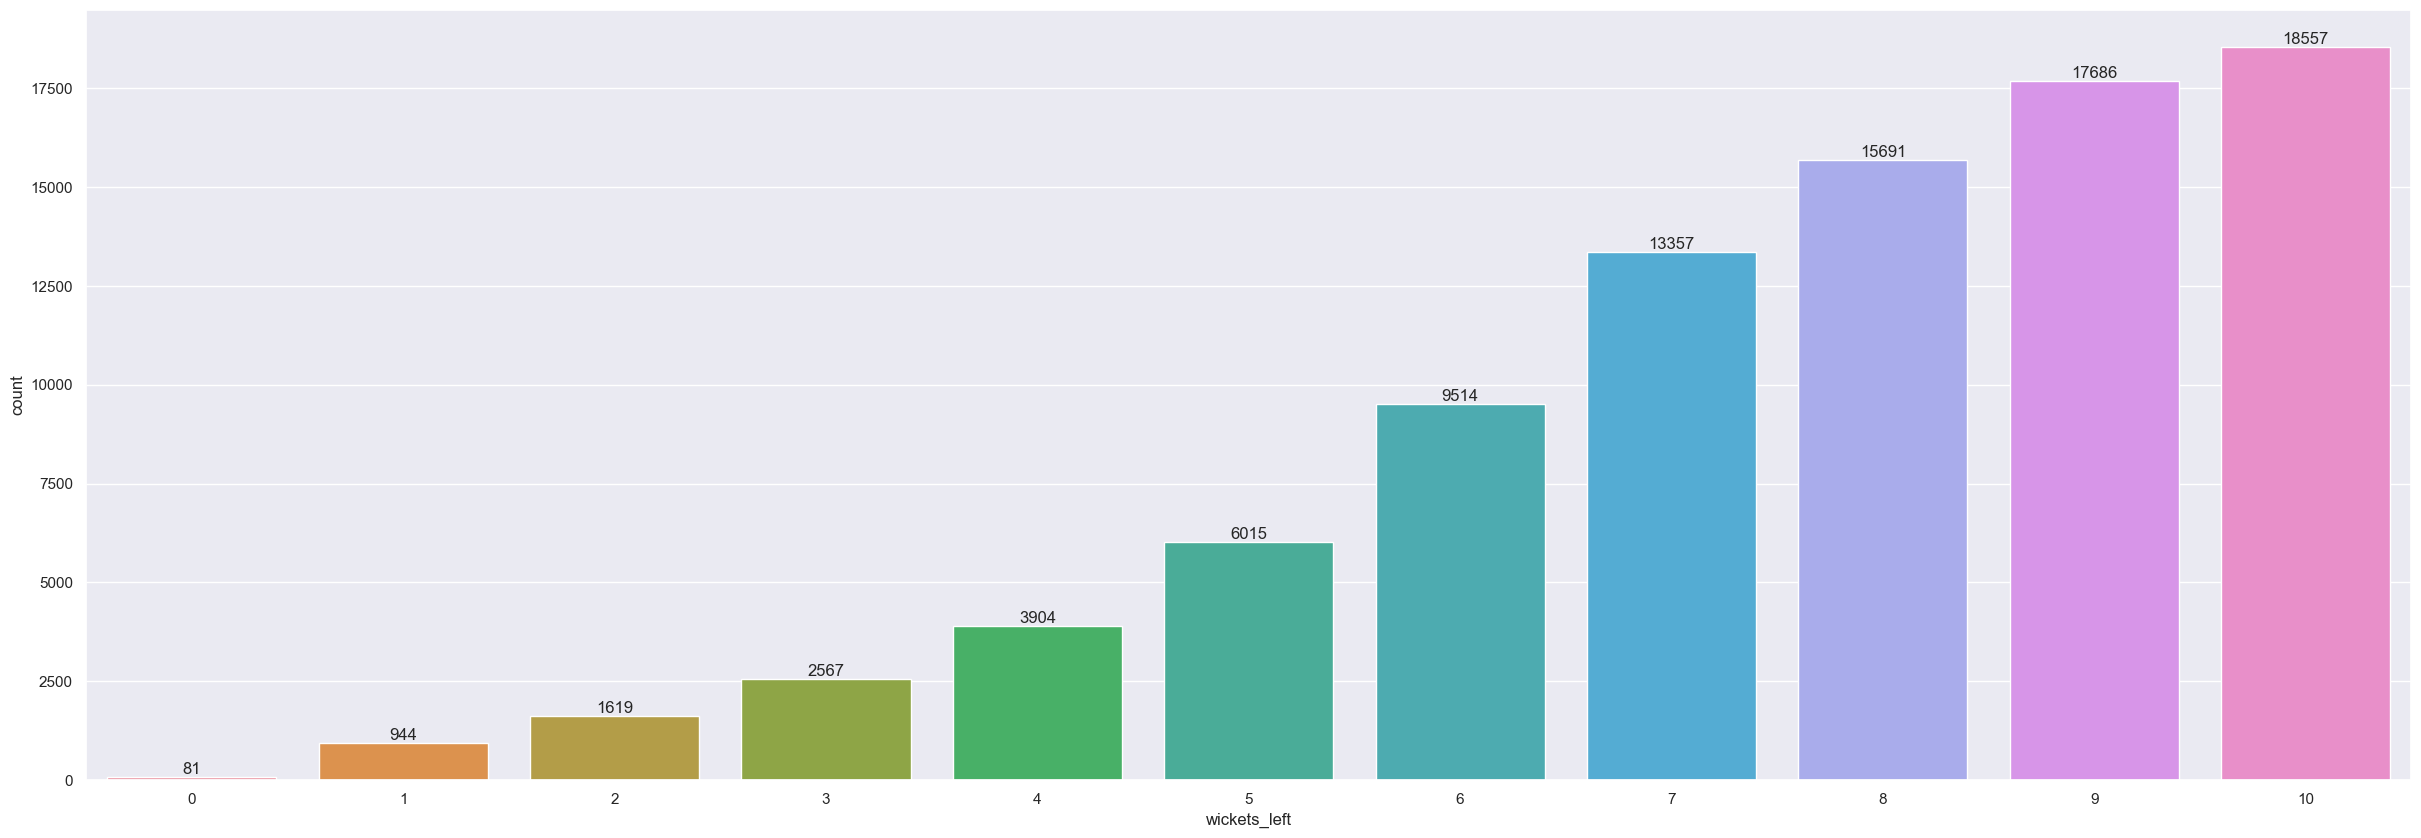

In [65]:
ax=sns.countplot(data=final_df,x='wickets_left')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax.containers:
    ax.bar_label(bars)

In [66]:
fig = px.histogram(final_df['target'], nbins=30)
fig.show()

In [67]:
final_df.describe()

runs_left    balls_left  wickets_left  current_run_rate  \
count  89935.000000  89935.000000  89935.000000      89935.000000   
mean      92.865292     62.801268      7.543548          7.444256   
std       49.725731     33.416991      2.148363          2.265171   
min        0.000000      0.000000      0.000000          0.000000   
25%       54.000000     35.000000      6.000000          6.285714   
50%       92.000000     64.000000      8.000000          7.500000   
75%      130.000000     92.000000      9.000000          8.672727   
max      247.000000    119.000000     10.000000         36.000000   

       required_run_rate        target        result  
count       89935.000000  89935.000000  89935.000000  
mean           10.554091    165.993228      0.527014  
std            12.874855     28.852357      0.499272  
min             0.000000     68.000000      0.000000  
25%             7.200000    148.000000      0.000000  
50%             8.896552    166.000000      1.000000  
75%            10.935484    186.000000      1.000000  
max           714.000000    247.000000      1.000000

In [68]:
final_df.isna().sum()

BattingTeam          0
BowlingTeam          0
City                 0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
target               0
result               0
dtype: int64

In [69]:
final_df.shape

(89935, 10)

In [70]:
final_df.sample(final_df.shape[0])

BattingTeam                  BowlingTeam  \
42851           Chennai Super Kings  Royal Challengers Bangalore   
20045   Royal Challengers Bangalore          Sunrisers Hyderabad   
143369             Rajasthan Royals               Delhi Capitals   
66779                Delhi Capitals  Royal Challengers Bangalore   
133677               Mumbai Indians          Chennai Super Kings   
...                             ...                          ...   
4749                 Delhi Capitals          Chennai Super Kings   
40478                  Punjab Kings          Sunrisers Hyderabad   
57855           Sunrisers Hyderabad               Delhi Capitals   
159360  Royal Challengers Bangalore          Sunrisers Hyderabad   
128041               Mumbai Indians               Delhi Capitals   

                City  runs_left  balls_left  wickets_left  current_run_rate  \
42851      Bengaluru        106          61             6          5.694915   
20045      Abu Dhabi         56          41             7          6.531646   
143369        Jaipur        111          92             9          8.785714   
66779          Delhi         35          18             3          7.470588   
133677       Chennai         42          67             8          8.037736   
...              ...        ...         ...           ...               ...   
4749     Navi Mumbai        128          62             5          8.379310   
40478      Hyderabad         84          29             5          8.505495   
57855      Hyderabad         66          40             8          7.350000   
159360  Johannesburg         34          20             2          6.600000   
128041         Delhi         47           9             3          8.702703   

        required_run_rate  target  result  
42851           10.426230     162       0  
20045            8.195122     142       0  
143369           7.239130     152       1  
66779           11.666667     162       0  
133677           3.761194     113       1  
...                   ...     ...     ...  
4749            12.387097     209       0  
40478           17.379310     213       0  
57855            9.900000     164       1  
159360          10.200000     144       0  
128041          31.333333     208       0  

[89935 rows x 10 columns]

# Things analysed:

# i) Match won by the maximum margin of runs.

In [71]:
max_margin = final_df[final_df['result'] == 1]['runs_left'].max()
match_won_by_max_margin = final_df[(final_df['result'] == 1) & (final_df['runs_left'] == max_margin)]
print("Match won by the maximum margin of runs:")
print(match_won_by_max_margin[['BattingTeam', 'BowlingTeam', 'City', 'runs_left']])


Match won by the maximum margin of runs:
             BattingTeam          BowlingTeam       City  runs_left
25904     Mumbai Indians  Chennai Super Kings      Delhi        215
25905     Mumbai Indians  Chennai Super Kings      Delhi        215
184228  Rajasthan Royals  Sunrisers Hyderabad  Hyderabad        215
184229  Rajasthan Royals  Sunrisers Hyderabad  Hyderabad        215


# ii) Match won by maximum wickets.

In [72]:
max_wickets = final_df[final_df['result'] == 1]['wickets_left'].max()
match_won_by_max_wickets = final_df[(final_df['result'] == 1) & (final_df['wickets_left'] == max_wickets)]
print("Match won by maximum wickets:")
print(match_won_by_max_wickets[['BattingTeam', 'BowlingTeam', 'City', 'wickets_left']])

Match won by maximum wickets:
           BattingTeam       BowlingTeam       City  wickets_left
120     Gujarat Titans  Rajasthan Royals  Ahmedabad            10
121     Gujarat Titans  Rajasthan Royals  Ahmedabad            10
122     Gujarat Titans  Rajasthan Royals  Ahmedabad            10
123     Gujarat Titans  Rajasthan Royals  Ahmedabad            10
124     Gujarat Titans  Rajasthan Royals  Ahmedabad            10
...                ...               ...        ...           ...
185663  Delhi Capitals  Rajasthan Royals      Delhi            10
185664  Delhi Capitals  Rajasthan Royals      Delhi            10
185665  Delhi Capitals  Rajasthan Royals      Delhi            10
185666  Delhi Capitals  Rajasthan Royals      Delhi            10
185667  Delhi Capitals  Rajasthan Royals      Delhi            10

[12312 rows x 4 columns]


# iii) Match won by the minimum margin of runs.

In [73]:
min_margin = final_df[final_df['result'] == 1]['runs_left'].min()
match_won_by_min_margin = final_df[(final_df['result'] == 1) & (final_df['runs_left'] == min_margin)]
match_won_by_min_margin[['BattingTeam', 'BowlingTeam', 'City', 'runs_left']]

BattingTeam                  BowlingTeam       City  \
232                  Gujarat Titans             Rajasthan Royals  Ahmedabad   
468                Rajasthan Royals  Royal Challengers Bangalore  Ahmedabad   
976                  Gujarat Titans             Rajasthan Royals    Kolkata   
1196                   Punjab Kings          Sunrisers Hyderabad     Mumbai   
1443                 Mumbai Indians               Delhi Capitals     Mumbai   
...                             ...                          ...        ...   
184809               Delhi Capitals          Sunrisers Hyderabad  Hyderabad   
185050             Rajasthan Royals                 Punjab Kings     Jaipur   
185290        Kolkata Knight Riders          Sunrisers Hyderabad    Kolkata   
185536  Royal Challengers Bangalore               Mumbai Indians     Mumbai   
185755               Delhi Capitals             Rajasthan Royals      Delhi   

        runs_left  
232             0  
468             0  
976             0  
1196            0  
1443            0  
...           ...  
184809          0  
185050          0  
185290          0  
185536          0  
185755          0  

[428 rows x 4 columns]

# iv) Match won by minimum wickets

In [74]:
min_wickets = final_df[final_df['result'] == 1]['wickets_left'].min()
match_won_by_min_wickets = final_df[(final_df['result'] == 1) & (final_df['wickets_left'] == min_wickets)]
match_won_by_min_wickets[['BattingTeam', 'BowlingTeam', 'City', 'wickets_left']]


BattingTeam     BowlingTeam       City  wickets_left
64832    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64833    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64834    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64835    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64836    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64837    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64838    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
64839    Sunrisers Hyderabad  Mumbai Indians  Hyderabad             1
66179    Chennai Super Kings  Mumbai Indians     Mumbai             1
66180    Chennai Super Kings  Mumbai Indians     Mumbai             1
66181    Chennai Super Kings  Mumbai Indians     Mumbai             1
66182    Chennai Super Kings  Mumbai Indians     Mumbai             1
66183    Chennai Super Kings  Mumbai Indians     Mumbai             1
66184    Chennai Super Kings  Mumbai Indians     Mumbai             1
84596  Kolkata Knight Riders    Punjab Kings    Kolkata             1
84597  Kolkata Knight Riders    Punjab Kings    Kolkata             1

# v) Matches where D/L method was and wasn't applied.

In [75]:
# Filter matches where D/L method was applied
dl_matches = df2[df2['method'].notna()]
print("Matches where D/L method was applied:")
print(dl_matches)

# Filter matches where D/L method wasn't applied
non_dl_matches = df2[df2['method'].isna()]
print("Matches where D/L method wasn't applied:")
print(non_dl_matches)

Matches where D/L method was applied:
          ID           City        Date   Season MatchNumber  \
282  1136592          Delhi  2018-05-02     2018          32   
296  1136578        Kolkata  2018-04-21     2018          18   
308  1136566         Jaipur  2018-04-11     2018           6   
316  1082648      Bangalore  2017-05-17     2017  Eliminator   
383   980999      Bangalore  2016-05-18     2016          50   
384   980997  Visakhapatnam  2016-05-17     2016          49   
389   980989        Kolkata  2016-05-14     2016          45   
411   980943      Hyderabad  2016-04-26     2016          22   
441   829807      Hyderabad  2015-05-15     2015          52   
472   829743  Visakhapatnam  2015-04-22     2015          19   
520   733993          Delhi  2014-05-10     2014          32   
717   501255      Bangalore  2011-05-14     2011          58   
728   501245        Kolkata  2011-05-07     2011          48   
757   501215          Kochi  2011-04-18     2011          18   
86

# vi) No. of matches held in each city.

In [76]:
city_counts = ipl2['City'].value_counts()
print("Number of matches held in each city:")
print(city_counts)

Number of matches held in each city:
Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: City, dtype: int64


# vii) No. of matches won by each team.

In [77]:
team_wins = ipl2['WinningTeam'].value_counts()
print("Number of matches won by each team:")
print(team_wins)

Number of matches won by each team:
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: WinningTeam, dtype: int64


# viii) No. of matches held every season.

In [78]:
matches_per_season = ipl2.groupby('Season').size()
print(matches_per_season)

Season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
dtype: int64


# ix) Top 10 players based on no. of Man of Match (MOM) awards won.

In [79]:
#WE DONT HAVE ANY DIRECT COLUMN TO FIND OUT MOM PLAYERS SO WE NEED TO CREAT SOME USEFULL COLUMN FIRST : - 
    
    
# Merge the 'ipl1' and 'ipl2' DataFrames on the common columns
merged_data = ipl1.merge(ipl2[['ID', 'WinningTeam']], on='ID')

top_players = merged_data['batter'].value_counts()

top_players_df = pd.DataFrame({'Player': top_players.index, 'MOM Awards': top_players.values})

top_players_df = top_players_df.sort_values(by='MOM Awards', ascending=False)

top_10_players = top_players_df.head(10)

print(top_10_players)


           Player  MOM Awards
0         V Kohli        5266
1        S Dhawan        5083
2       RG Sharma        4632
3       DA Warner        4313
4        SK Raina        3546
5       G Gambhir        3524
6        CH Gayle        3516
7  AB de Villiers        3487
8       AT Rayudu        3375
9        MS Dhoni        3321


# x) Does winning the toss mean winning the match?

In [80]:
# Calculate the percentage of matches won by the team winning the toss
total_matches = len(final_df)
toss_win_matches = final_df[final_df['result'] == 1]

toss_win_percentage = (len(toss_win_matches) / total_matches) * 100

print(f"The percentage of matches won by the team winning the toss: {toss_win_percentage:.2f}%")

The percentage of matches won by the team winning the toss: 52.70%


# xi) What was the decision taken by captains when they won the toss?

In [81]:
captain_decision = ipl2[ipl2['TossWinner'] == ipl2['WinningTeam']][['TossDecision']]
decision_counts = captain_decision['TossDecision'].value_counts()

print("Captain Decision after Winning Toss:")
print(decision_counts)

decision_counts.iplot(kind='bar', title='Captain Decision after Winning Toss')


Captain Decision after Winning Toss:
field    330
bat      159
Name: TossDecision, dtype: int64


# xii) No. of matches where D/L method was applied every season.

In [82]:
# Filter matches where D/L method was applied
dl_matches = df2[df2['method'] == 'D/L']

# Count the number of D/L matches per season
dl_matches_per_season = dl_matches['Season'].value_counts()


dl_matches_per_season

2016       4
2018       3
2011       3
2009       3
2015       2
2007/08    2
2017       1
2014       1
Name: Season, dtype: int64

# xiii) Different results for matches

In [83]:
#  the rows of the final_df DataFrame (results)
shuffled_df = final_df.sample(frac=1).reset_index(drop=True)


shuffled_df.head()


BattingTeam            BowlingTeam       City  runs_left  \
0               Mumbai Indians    Chennai Super Kings       Pune        134   
1  Royal Challengers Bangalore    Sunrisers Hyderabad  Bangalore         98   
2        Kolkata Knight Riders           Punjab Kings    Kolkata        104   
3               Mumbai Indians  Kolkata Knight Riders    Kolkata         14   
4                 Punjab Kings    Sunrisers Hyderabad  Hyderabad        112   

   balls_left  wickets_left  current_run_rate  required_run_rate  target  \
0          92            10          7.714286           8.739130     170   
1          62            10         11.482759           9.483871     209   
2          97             8          8.086957           6.432990     135   
3           9             6          7.891892           9.333333     160   
4          53             6          6.626866          12.679245     186   

   result  
0       1  
1       0  
2       0  
3       1  
4       0

# xiv) How many times did a team win the toss?

In [84]:
team_toss_wins = ipl2['Team1'].value_counts()
print(team_toss_wins)

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64


# xv) Best venue for defending and chasing a total.

In [85]:
# Average runs scored and allowed for defending
defending_avg = final_df.groupby('City').agg({'runs_left': 'mean'}).sort_values('runs_left', ascending=False)

# Average runs scored and allowed for chasing
chasing_avg = final_df.groupby('City').agg({'runs_left': 'mean'}).sort_values('runs_left')

print("Best Venue for Defending a Total:")
print(defending_avg.head(1))

print("\nBest Venue for Chasing a Total:")
print(chasing_avg.head(1))


Best Venue for Defending a Total:
             runs_left
City                  
Dharamsala  108.072797

Best Venue for Chasing a Total:
         runs_left
City              
Sharjah  74.843243


# xvi) Best defending and chasing teams.

In [86]:
# Defending team win percentages
defending_wins = final_df[final_df['runs_left'] == 0]['BattingTeam'].value_counts(normalize=True) * 100

# Chasing team win percentages
chasing_wins = final_df[final_df['runs_left'] > 0]['BattingTeam'].value_counts(normalize=True) * 100

print("Best Defending Teams:")
print(defending_wins.head(1))

print("\nBest Chasing Teams:")
print(chasing_wins.head(1))


Best Defending Teams:
Royal Challengers Bangalore    14.953271
Name: BattingTeam, dtype: float64

Best Chasing Teams:
Kolkata Knight Riders    13.7587
Name: BattingTeam, dtype: float64


# xvii) No. of matches played in different stadiums.

In [87]:
matches_per_stadium = final_df['City'].value_counts()
print(matches_per_stadium)

Mumbai            16744
Kolkata            8242
Delhi              7917
Chennai            7531
Hyderabad          6558
Bangalore          5999
Chandigarh         5773
Jaipur             4869
Abu Dhabi          4215
Pune               2819
Ahmedabad          2178
Durban             1785
Bengaluru          1713
Dubai              1526
Centurion          1380
Visakhapatnam      1110
Sharjah            1110
Navi Mumbai        1055
Dharamsala         1044
Johannesburg        945
Port Elizabeth      807
Cape Town           715
Cuttack             714
Ranchi              711
Indore              595
Raipur              566
Nagpur              372
Kimberley           358
East London         335
Bloemfontein        249
Name: City, dtype: int64
